In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')


In [ ]:
data.shape

(7553, 100, 100, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
170/170 [==============================] - 191s 1s/step - loss: 0.6303 - accuracy: 0.6489 - val_loss: 0.5316 - val_accuracy: 0.7500
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
170/170 [==============================] - 192s 1s/step - loss: 0.5042 - accuracy: 0.7557 - val_loss: 0.4276 - val_accuracy: 0.8081
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
170/170 [==============================] - 191s 1s/step - loss: 0.3939 - accuracy: 0.8181 - val_loss: 0.3593 - val_accuracy: 0.8353
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
170/170 [==============================] - 193s 1s/step - loss: 0.3122 - accuracy: 0.8602 - val_loss: 0.3126 - val_accuracy: 0.8676
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
170/170 [==============================] - 196s 1s/step - loss: 0.2661 - accuracy: 0.8856 - val_loss: 0.2993 - val_accuracy: 0.8757
INFO:tensorflow:Assets written to: model-005.model\as

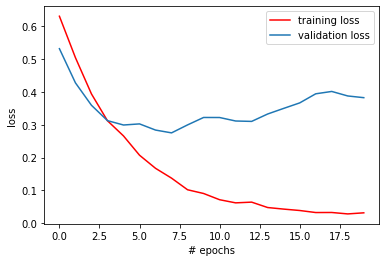

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

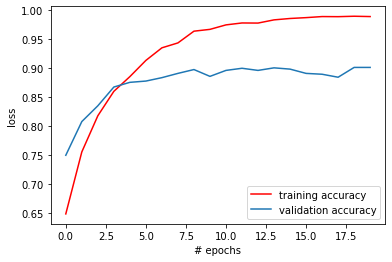

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

24/24 [==============================] - 7s 297ms/step - loss: 0.4276 - accuracy: 0.9034
[0.42764556407928467, 0.9034391641616821]
